In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout, CuDNNLSTM

Using TensorFlow backend.


In [2]:
btc1mdata = pd.read_csv('D:/Downloads/MLBTC/btcusdgemini1m.csv')

In [3]:
btc1mdata.head(2)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1546300000000,1/1/19 1:09,BTCUSD,3690.50,3690.50,3690.4,3690.5,0.719779
1,1546300000000,1/1/19 1:08,BTCUSD,3692.85,3692.85,3690.5,3690.5,0.001084


In [4]:
btc1mdata.tail(2)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
226115,1560560000000,6/14/19 23:31,BTCUSD,8687.45,8729.17,8687.45,8729.17,31.177668
226116,1560560000000,6/14/19 23:30,BTCUSD,8681.27,8687.45,8681.27,8687.45,1.000000


In [5]:
btc1mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226117 entries, 0 to 226116
Data columns (total 8 columns):
Unix Timestamp    226117 non-null int64
Date              226117 non-null object
Symbol            226117 non-null object
Open              226117 non-null float64
High              226117 non-null float64
Low               226117 non-null float64
Close             226117 non-null float64
Volume            226117 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.8+ MB


In [6]:
btc1mframe = btc1mdata.iloc[:,[6,7]]

In [7]:
print(btc1mframe)

          Close     Volume
0       3690.50   0.719779
1       3690.50   0.001084
2       3692.85   0.090747
3       3693.35   0.411550
4       3693.85   0.000000
5       3693.85   0.000000
6       3693.85   0.027772
7       3695.96   0.674426
8       3696.16   0.133923
9       3696.35   0.009416
10      3696.16   0.105899
11      3694.39   0.055730
12      3692.37   0.267510
13      3699.41   1.384426
14      3696.11   2.594000
15      3700.00   0.624298
16      3700.00   0.052000
17      3700.00   0.029730
18      3700.00   0.100947
19      3700.00   0.000000
20      3700.00   0.015555
21      3697.67   0.075336
22      3695.52   1.326080
23      3695.50   0.026120
24      3695.50   0.123307
25      3695.00   1.349829
26      3691.68   0.013785
27      3691.68   0.005562
28      3691.68   0.000000
29      3691.68   0.041111
...         ...        ...
226087  8699.71   0.028163
226088  8700.92   0.069165
226089  8694.94   3.467066
226090  8681.97   5.327475
226091  8680.92   0.364869
2

In [8]:
input_data = btc1mframe

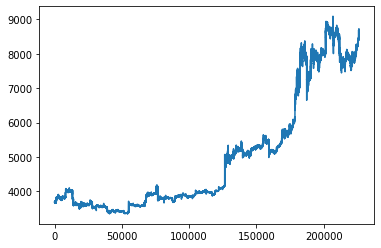

In [9]:
plt.plot(btc1mframe['Close'])

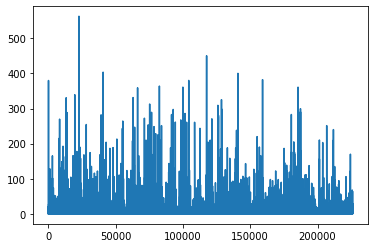

In [10]:
plt.plot(btc1mframe['Volume'])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(btc1mframe)

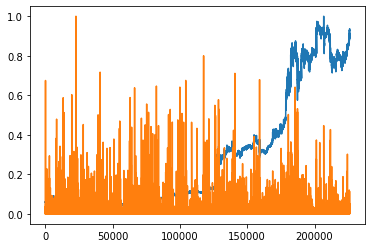

In [12]:
plt.plot(input_data)

In [13]:
lookback= 50

test_size=int(.3 * len(input_data))
X=[]
y=[]
for i in range(len(input_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,0])

In [14]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(226066, 50, 2)
(67885, 50, 2)


In [15]:
model = Sequential()
model.add(CuDNNLSTM(units=50, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 50, 50)            10800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 50, 50)            20400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 50)                20400     
_________________________________________________________________
dropout_3 (Dropout)  

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(X, y, epochs=200, batch_size=9999)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
226066/226066 [==============================] - 12s 52us/step - loss: 0.0261
Epoch 2/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0027
Epoch 3/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0019
Epoch 4/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0017
Epoch 5/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0015
Epoch 6/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0014
Epoch 7/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0014
Epoch 8/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0013
Epoch 9/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0013
Epoch 10/200
226066/226066 [==============================] - 9s 38us/step - loss: 0.0012
Epoch 11/200
226066/226066 [==============================] 

226066/226066 [==============================] - 10s 43us/step - loss: 6.1150e-04
Epoch 86/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.8911e-04
Epoch 87/200
226066/226066 [==============================] - 10s 43us/step - loss: 6.0120e-04
Epoch 88/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.7727e-04
Epoch 89/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.8116e-04
Epoch 90/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.7356e-04
Epoch 91/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.7757e-04
Epoch 92/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.8534e-04
Epoch 93/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.6972e-04
Epoch 94/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.6107e-04
Epoch 95/200
226066/226066 [==============================] - 1

226066/226066 [==============================] - 10s 44us/step - loss: 4.9670e-04
Epoch 171/200
226066/226066 [==============================] - 10s 44us/step - loss: 5.0207e-04
Epoch 172/200
226066/226066 [==============================] - 10s 43us/step - loss: 4.8659e-04
Epoch 173/200
226066/226066 [==============================] - 10s 43us/step - loss: 4.8182e-04
Epoch 174/200
226066/226066 [==============================] - 10s 44us/step - loss: 4.8208e-04
Epoch 175/200
226066/226066 [==============================] - 10s 44us/step - loss: 4.8644e-04
Epoch 176/200
226066/226066 [==============================] - 10s 44us/step - loss: 4.9516e-04
Epoch 177/200
226066/226066 [==============================] - 10s 44us/step - loss: 4.9529e-04
Epoch 178/200
226066/226066 [==============================] - 10s 43us/step - loss: 5.0725e-04
Epoch 179/200
226066/226066 [==============================] - 10s 43us/step - loss: 4.8673e-04
Epoch 180/200
226066/226066 [=========================

In [18]:
predicted_value= model.predict(X_test)

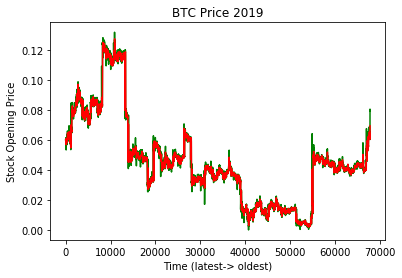

In [24]:
plt.plot(input_data[lookback:test_size+(2*lookback),0], color='green')
plt.plot(predicted_value, color= 'red')
plt.title("BTC Price 2019")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [25]:
model.save('price.h5')

In [58]:
print(len(predicted_value))
print(input_data[0][1])
tap = np.zeros((67885,2))
print(tap)
for i in range (0,67885):
    tap[i][0] = predicted_value[i]
    tap[i][1] = None
print(tap)
inv = scaler.inverse_transform(tap)

67885
0.0012791787177760785
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.0598473         nan]
 [0.05978058        nan]
 [0.05973521        nan]
 ...
 [0.0669897         nan]
 [0.06822346        nan]
 [0.06941034        nan]]


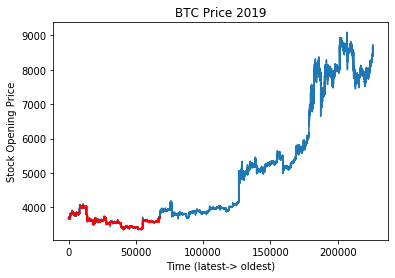

In [59]:
plt.plot(btc1mframe['Close'])
plt.plot(inv, color= 'red')
plt.title("BTC Price 2019")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()